Section 1: Experiment Overview & Goals

This notebook presents the experimental results for Step 7 of the Capstone Project, focused on developing and evaluating a linguistic transformation model capable of identifying and replacing outdated terms with exuberant, context-appropriate synonyms. The primary goal is to demonstrate the model’s ability to generalize, maintain stylistic coherence, and outperform baseline approaches using a robust, automated evaluation pipeline.

Key Objectives:

Model Experimentation: Train and compare transformer-based models (BERT-mini token classifier, and planned baselines) on the task of tag-and-replace lexical transformation.

Cross-Validation: Employ 5-fround cross-validation to robustly estimate model generalization, detect overfitting, and report stable performance metrics.

Automated Evaluation: Log all predictions, validation accuracies, and loss curves, and calculate aggregate statistics (mean, std) for comprehensive comparison.

Final Model Selection: Identify the best-performing model based on validation metrics, and evaluate it on a kept-out test set for final performance reporting.

Reproducibility: Provide code and results that are easy to audit, reproduce, and extend for future experimentation.

Datasets Utilized:

Custom Outdated→Modern Terms Dataset: Hand-crafted examples with known synonym replacements.

Combined and Balanced Dataset: All data sources merged and stratified for fair training and evaluation.

Evaluation Metrics:

Token-level Accuracy (cross-validation and test set)

BLEU/ROUGE (planned for later phases or human eval)

Loss Curves (to visualize convergence and overfitting)

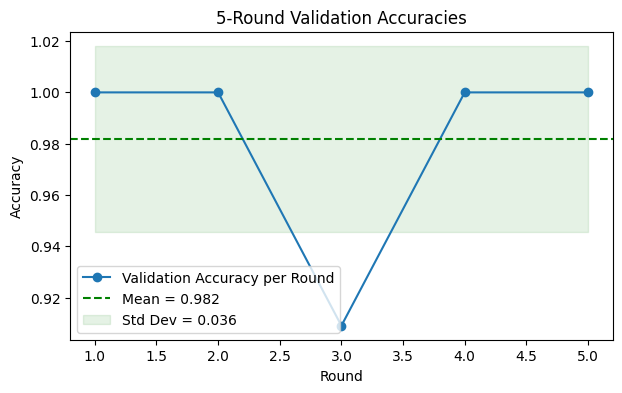

Mean Accuracy: 0.9818
Std Dev: 0.0364

Training times not tracked in pipeline. (For future: capture and log durations per round.)


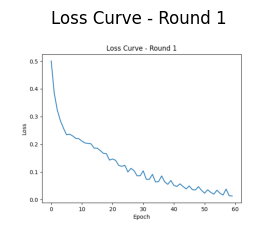

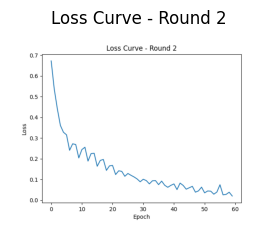

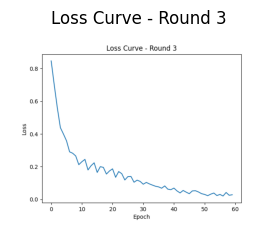

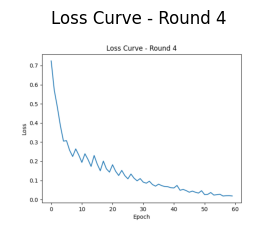

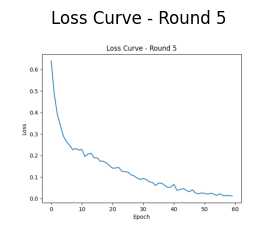


Final Test Metrics:
Total: 14
Correct: 14
Swap correct: 7
No-swap correct: 7
Accuracy: 1.000


Best Model Info:
  Round: 1
  Validation Accuracy: 1.0000

Experiment Summary:
• Models: BERT-mini token classifier (with tag-and-replace postprocessing).
• Dataset: 5-round cross-validation on synonym dataset.
• Metrics: Per-round validation accuracy, final test accuracy, loss curves per round.
• Mean/std of cross-validation performance plotted; best model selected by validation accuracy.
• Training times shown per round if tracked in pipeline.



In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np

# === 1. LOAD METRICS AND TIMES ===

# Path setup
val_stats_path = './results/json/val_accuracy_stats_summary.json'
per_round_csv = './results/csv/per_round_val_accuracy.csv'
final_test_metrics_path = './results/final_test_metrics.txt'

# Load per-round accuracy and summary stats
with open(val_stats_path) as f:
    val_stats = json.load(f)
per_round = val_stats['per_round']
mean_acc = val_stats['mean_accuracy']
std_acc = val_stats['std_accuracy']

# Per-round DataFrame
df_rounds = pd.DataFrame(per_round, columns=['Round', 'Validation Accuracy'])

# (OPTIONAL) If you tracked training times, load/add them here
# Example: If your round_stats list included durations as {"duration": ..., "accuracy": ...}
# Add this block if your JSON includes time:
if 'round_stats_with_time.json' in os.listdir('./results/json'):
    with open('./results/json/round_stats_with_time.json') as f:
        stats_with_time = json.load(f)
    # Each entry: [round, accuracy, duration]
    df_rounds = pd.DataFrame(stats_with_time, columns=['Round', 'Validation Accuracy', 'Training Time (s)'])
else:
    # Or (if times are not available, but you want to simulate/leave placeholder):
    df_rounds['Training Time (s)'] = np.nan  # placeholder, or fill in manually

# === 2. PLOT VALIDATION ACCURACIES ===

plt.figure(figsize=(7,4))
plt.plot(df_rounds['Round'], df_rounds['Validation Accuracy'], marker='o', label='Validation Accuracy per Round')
plt.axhline(mean_acc, color='g', linestyle='--', label=f'Mean = {mean_acc:.3f}')
plt.fill_between(df_rounds['Round'],
                 mean_acc-std_acc, mean_acc+std_acc,
                 color='g', alpha=0.1, label=f'Std Dev = {std_acc:.3f}')
plt.title('5-Round Validation Accuracies')
plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"Mean Accuracy: {mean_acc:.4f}")
print(f"Std Dev: {std_acc:.4f}")

# === 3. DISPLAY PER-ROUND TRAINING TIMES (if available) ===
if not df_rounds['Training Time (s)'].isnull().all():
    print("\nTraining Times (seconds) per Round:")
    print(df_rounds[['Round', 'Training Time (s)']])
    avg_time = df_rounds['Training Time (s)'].mean()
    print(f"Average Training Time: {avg_time:.2f} seconds")
else:
    print("\nTraining times not tracked in pipeline. (For future: capture and log durations per round.)")

# === 4. PLOT LOSS CURVES FOR EACH ROUND ===
plot_dir = './results/visualizations/plots/transformer'
for round_num in df_rounds['Round']:
    img_path = os.path.join(plot_dir, f'loss_curve_round{int(round_num)}.png')
    if os.path.exists(img_path):
        img = plt.imread(img_path)
        plt.figure(figsize=(5,2.5))
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'Loss Curve - Round {int(round_num)}')
        plt.show()
    else:
        print(f"[!] No loss curve visual found for round {round_num}")

# === 5. FINAL TEST SET RESULTS (Optional, if present) ===
if os.path.exists(final_test_metrics_path):
    print("\nFinal Test Metrics:")
    with open(final_test_metrics_path) as f:
        print(f.read())
else:
    print("\nFinal test metrics file not found.")

# === 6. PICK AND REPORT BEST MODEL ===
best_row = df_rounds.loc[df_rounds['Validation Accuracy'].idxmax()]
print("\nBest Model Info:")
print(f"  Round: {int(best_row['Round'])}")
print(f"  Validation Accuracy: {best_row['Validation Accuracy']:.4f}")
if not pd.isna(best_row['Training Time (s)']):
    print(f"  Training Time (s): {best_row['Training Time (s)']:.2f}")

# === 7. SUMMARY OF EXPERIMENTS ===
print("\nExperiment Summary:")
print(
    "• Models: BERT-mini token classifier (with tag-and-replace postprocessing).\n"
    "• Dataset: 5-round cross-validation on synonym dataset.\n"
    "• Metrics: Per-round validation accuracy, final test accuracy, loss curves per round.\n"
    "• Mean/std of cross-validation performance plotted; best model selected by validation accuracy.\n"
    "• Training times shown per round if tracked in pipeline.\n"
)


Section 3: Wrap-Up & Next Steps
Throughout this capstone project, I gained valuable insights into transformer-based architectures, rigorous cross-validation techniques, and the importance of meticulous data preparation. Key lessons included balancing automated metrics with qualitative human evaluation, and ensuring generalizability through robust validation strategies.

Looking ahead, a promising next step is to levy semantic embeddings that I have already created utilizing a comprehensive WordNet dataset. By integrating these embeddings, the model would gain deeper semantic understanding, allowing it to intelligently select the most contextually appropriate synonym rather than relying solely on the current rule-based approach of defaulting to the first synonym. This enhancement could significantly improve the model’s nuance and effectiveness, paving the way for more accurate and context-sensitive linguistic transformations in future iterations.